In [103]:
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

<h1 style="text-align:center">🏰 Data Modelling</h1> 

<h3 style="text-align:center">Predict BTC prices</h3> 

# 🎖 1. Get newest data points

## ➡️ Define symbol and time interval

In [104]:
symbol = "BTCUSDT"
PERIOD = "15m"

In [105]:
!jupyter nbconvert --to python ../obtain/get_newest_price.ipynb
!python ../obtain/get_newest_price.py

[NbConvertApp] Converting notebook ../obtain/get_newest_price.ipynb to python
[NbConvertApp] Writing 1547 bytes to ../obtain/get_newest_price.py


In [106]:
#pd_df = pd.read_csv(f"../../datastore/price/{symbol}_{PERIOD}.csv")
#pd_df = pd_df.iloc[-1800:]
pd_df = pd.read_csv('../Data/data.csv')
try:
    pd_df.drop(columns=['Unnamed: 0','base','quote','Unused field, ignore'],inplace=True)
except:
    pass
pd_df = pd_df[pd_df.Symbol == symbol].drop(columns='Symbol',inplace=True)
pd_df

,Kline open time,Open price,High price,Low price,Close price,Volume,Kline Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
170710,1671607800000,16835.17,16837.59,16821.23,16829.76,996.10566,1671608699999,1.676382e+07,33757,508.34137,8.555189e+06
170711,1671608700000,16829.25,16834.63,16813.44,16816.18,1086.38621,1671609599999,1.827775e+07,33409,509.18575,8.567008e+06
170712,1671609600000,16816.18,16823.08,16800.31,16817.59,1740.08413,1671610499999,2.925137e+07,51633,872.88759,1.467394e+07
170713,1671610500000,16817.59,16820.86,16795.69,16808.83,1290.58846,1671611399999,2.169237e+07,40864,623.93959,1.048712e+07
170714,1671611400000,16809.47,16845.86,16797.10,16845.84,1819.35497,1671612299999,3.060518e+07,53193,1002.33643,1.686234e+07
...,...,...,...,...,...,...,...,...,...,...,...
172505,1673223300000,17167.85,17170.00,17104.94,17111.79,3591.58553,1673224199999,6.152115e+07,85395,1655.36256,2.835399e+07
172506,1673224200000,17111.50,17155.77,17104.66,17151.48,2731.86275,1673225099999,4.680905e+07,74126,1417.72451,2.429221e+07
172507,1673225100000,17151.48,17199.00,17138.49,17184.51,4983.40132,1673225999999,8.554001e+07,106820,2552.87222,4.382164e+07
172508,1673226000000,17185.28,17191.62,17148.59,17159.49,2777.13923,1673226899999,4.768213e+07,77425,1318.90144,2.264530e+07


## ➡️ Select features

### 📌 Using Open time as index to visualize later

In [107]:
pd_df["Open price"] = pd_df["Open price"].apply(lambda price: float(price))
pd_df = pd_df.set_index("Kline open time").sort_index() 
pd_df.index = pd.to_datetime(pd_df.index, unit='ms') + pd.Timedelta('07:00:00')
pd_df

Open price  High price  Low price  Close price  \
Kline open time                                                       
2022-12-21 14:30:00    16835.17    16837.59   16821.23     16829.76   
2022-12-21 14:45:00    16829.25    16834.63   16813.44     16816.18   
2022-12-21 15:00:00    16816.18    16823.08   16800.31     16817.59   
2022-12-21 15:15:00    16817.59    16820.86   16795.69     16808.83   
2022-12-21 15:30:00    16809.47    16845.86   16797.10     16845.84   
...                         ...         ...        ...          ...   
2023-01-09 07:15:00    17167.85    17170.00   17104.94     17111.79   
2023-01-09 07:30:00    17111.50    17155.77   17104.66     17151.48   
2023-01-09 07:45:00    17151.48    17199.00   17138.49     17184.51   
2023-01-09 08:00:00    17185.28    17191.62   17148.59     17159.49   
2023-01-09 08:15:00    17159.49    17163.33   17145.52     17161.63   

                         Volume  Kline Close time  Quote asset volume  \
Kline open time                                                         
2022-12-21 14:30:00   996.10566     1671608699999        1.676382e+07   
2022-12-21 14:45:00  1086.38621     1671609599999        1.827775e+07   
2022-12-21 15:00:00  1740.08413     1671610499999        2.925137e+07   
2022-12-21 15:15:00  1290.58846     1671611399999        2.169237e+07   
2022-12-21 15:30:00  1819.35497     1671612299999        3.060518e+07   
...                         ...               ...                 ...   
2023-01-09 07:15:00  3591.58553     1673224199999        6.152115e+07   
2023-01-09 07:30:00  2731.86275     1673225099999        4.680905e+07   
2023-01-09 07:45:00  4983.40132     1673225999999        8.554001e+07   
2023-01-09 08:00:00  2777.13923     1673226899999        4.768213e+07   
2023-01-09 08:15:00   901.37579     1673227799999        1.546126e+07   

                     Number of trades  Taker buy base asset volume  \
Kline open time                                                      
2022-12-21 14:30:00             33757                    508.34137   
2022-12-21 14:45:00             33409                    509.18575   
2022-12-21 15:00:00             51633                    872.88759   
2022-12-21 15:15:00             40864                    623.93959   
2022-12-21 15:30:00             53193                   1002.33643   
...                               ...                          ...   
2023-01-09 07:15:00             85395                   1655.36256   
2023-01-09 07:30:00             74126                   1417.72451   
2023-01-09 07:45:00            106820                   2552.87222   
2023-01-09 08:00:00             77425                   1318.90144   
2023-01-09 08:15:00             28507                    448.64685   

                     Taker buy base asset volume  \
Kline open time                                    
2022-12-21 14:30:00                  8.555189e+06  
2022-12-21 14:45:00                  8.567008e+06  
2022-12-21 15:00:00                  1.467394e+07  
2022-12-21 15:15:00                  1.048712e+07  
2022-12-21 15:30:00                  1.686234e+07  
...                                           ...  
2023-01-09 07:15:00                  2.835399e+07  
2023-01-09 07:30:00                  2.429221e+07  
2023-01-09 07:45:00                  4.382164e+07  
2023-01-09 08:00:00                  2.264530e+07  
2023-01-09 08:15:00                  7.695756e+06  

                     Taker buy quote asset volume  Unused field, ignore  
Kline open time                                                          
2022-11-26 00:00:00                  2.842171e+07                     0  
2022-11-26 00:30:00                  3.399223e+07                     0  
2022-11-26 01:00:00                  2.058911e+07                     0  
2022-11-26 01:30:00                  1.930727e+07                     0  
2022-11-26 02:00:00                  2.585432e+07                     0  
...                                      

### 📌 Visualize prices as candle stick

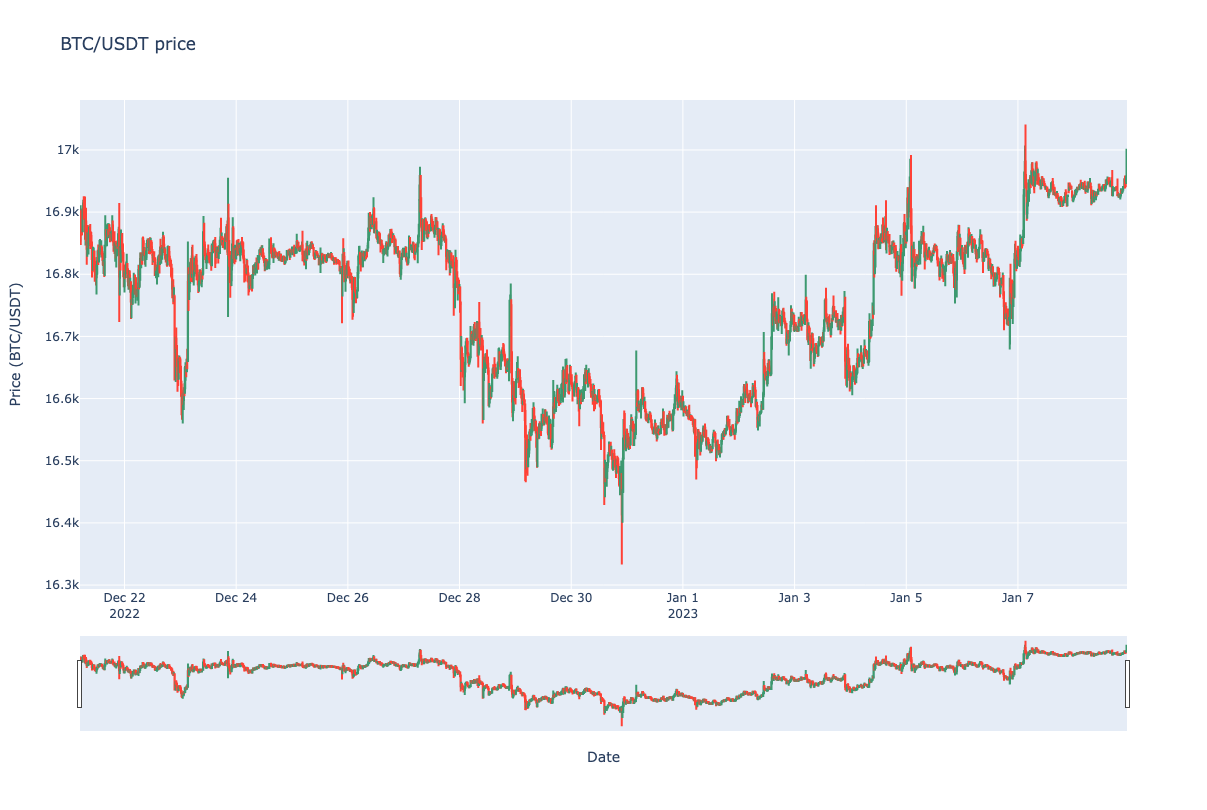

In [108]:
fig = go.Figure(data=[go.Candlestick(x=pd_df.index,
                open=pd_df['Open price'],
                high=pd_df['High price'],
                low=pd_df['Low price'],
                close=pd_df['Close price'])])
# set new height and width
fig.update_layout(
    height=800,
    width=1000,
    title_text="BTC/USDT price",
    yaxis_title="Price (BTC/USDT)",
    xaxis_title="Date",
    xaxis_rangeslider_visible=True
)

fig.show()

### 📌 Using open price as feature and target as well

In [7]:
dataset = pd_df.filter(["Open price"]).values
dataset[:5]

array([[16835.17],
       [16829.25],
       [16816.18],
       [16817.59],
       [16809.47]])

# 🎖 2. Prepare train-test set

✅ Train-Test ratio: `80%` train, `20%` test <br>
✅ Train-Valid ratio: `70%` train, `30%` valid

In [110]:
TRAIN_TEST_LENGTH = int(len(dataset) * 0.8)
TRAIN_VALID_LENGTH = int(TRAIN_TEST_LENGTH * 0.7)

## ➡️ Scale data

In [111]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data[:5]

array([[0.54596032],
       [0.53828297],
       [0.52133316],
       [0.52316172],
       [0.51263131]])

## ➡️ Prepare time series data

In [10]:
X = []
Y = []
for i in range(60,len(scaled_data)):
    X.append(scaled_data[i-60:i,:])
    Y.append(scaled_data[i,:])

X, Y = np.array(X), np.array(Y)
print(X.shape, Y.shape)

(1740, 60, 1) (1740, 1)


## ➡️ Split train-test set

In [11]:
X_origin_train = X[:TRAIN_TEST_LENGTH]
Y_origin_train = Y[:TRAIN_TEST_LENGTH]

X_test = X[TRAIN_TEST_LENGTH:]
Y_test = Y[TRAIN_TEST_LENGTH:]

print(X_origin_train.shape, Y_origin_train.shape)
print(X_test.shape, Y_test.shape)

(1440, 60, 1) (1440, 1)
(300, 60, 1) (300, 1)


## ➡️ Split train-valid set

In [12]:
X_valid = X_origin_train[TRAIN_VALID_LENGTH:]
Y_valid = Y_origin_train[TRAIN_VALID_LENGTH:]

X_train = X_origin_train[:TRAIN_VALID_LENGTH]
Y_train = Y_origin_train[:TRAIN_VALID_LENGTH]

print(X_train.shape, Y_train.shape)
print(X_valid.shape, Y_valid.shape)

(1007, 60, 1) (1007, 1)
(433, 60, 1) (433, 1)


# 🎖 3. Training

## ➡️ Declare functions

In [34]:
def visualize_prediction(preds):
    data = pd_df[["Open price"]]
    train = data[:TRAIN_VALID_LENGTH]
    valid = data[TRAIN_VALID_LENGTH:TRAIN_TEST_LENGTH].reset_index()
    valid["Predict"] = preds[:, 0]
    valid = valid.set_index("Kline open time")
    valid["Predict"]= valid["Predict"].apply(lambda price: float(price))

    concat_df = pd.concat([train, valid], axis=0)
    fig = px.line(concat_df[["Open price","Predict"]], title="BTC/USDT price" , width=1000, height=800)
    fig.show()

## ➡️ Linear Regression

### 📌 Build model and train

## ➡️ Linear Regression

### 📌 Build model and train

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()
model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1]), Y_train)

LinearRegression()

### 📌 Predict and transform to the original scale

In [38]:
predictions = model.predict(X_valid.reshape(X_valid.shape[0], X_valid.shape[1]))
predictions = scaler.inverse_transform(np.array(predictions))
predictions.shape

(433, 1)

### 📌 Visualize the prediction

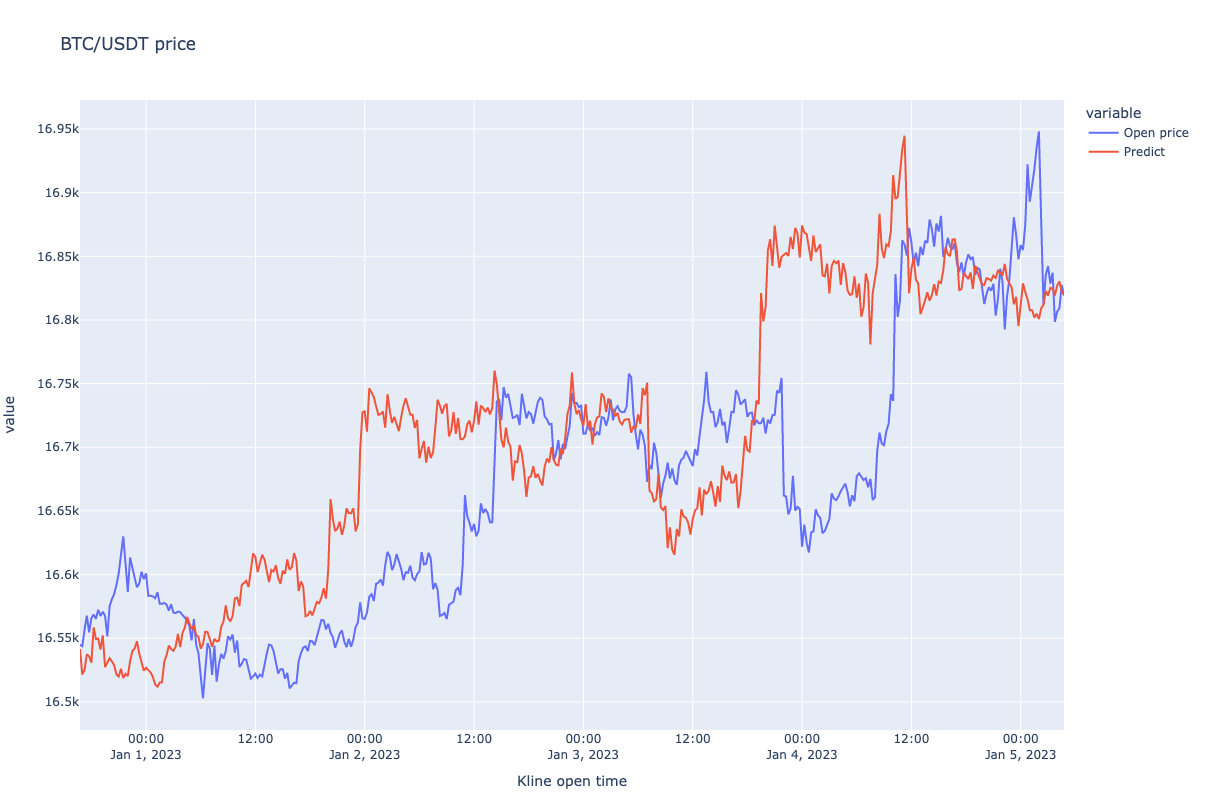

In [39]:
visualize_prediction(predictions)

## ➡️ Gated Recurrent Unit (GRU)

### 📌 Build model and train

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, LSTM

In [52]:
model = Sequential()
model.add(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(100))
model.add(Dense(X_train.shape[2]))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, Y_train, batch_size=1, epochs=1)

1007/1007 [==============================] - 15s 13ms/step - loss: 0.0019


### 📌 Predict and transform to the original scale

In [53]:
predictions = model.predict(X_valid)
predictions = scaler.inverse_transform(predictions)
predictions.shape

14/14 [==============================] - 1s 18ms/step


(433, 1)

### 📌 Visualize the prediction

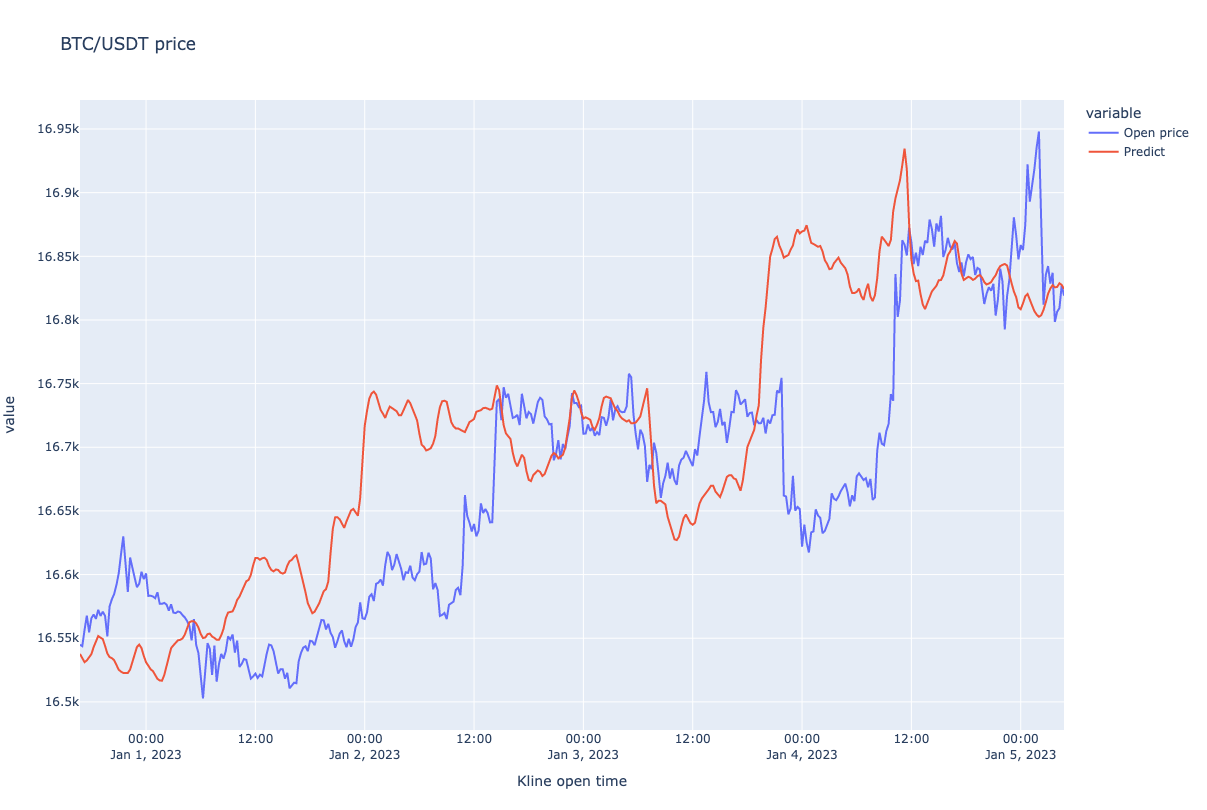

In [54]:
visualize_prediction(predictions)

## ➡️ Seasonal Auto Regressive Integrated Moving Average (SARIMAX)

In [120]:
from statsmodels.tsa.api import SARIMAX

### 📌 Prepare train-valid set again 

In [121]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)
SARIMAX_train, SARIMAX_test = scaled_data[:TRAIN_VALID_LENGTH], scaled_data[TRAIN_VALID_LENGTH:TRAIN_TEST_LENGTH]
print(SARIMAX_train.shape,SARIMAX_test.shape)

(1007, 1) (433, 1)


### 📌 Build model and train

In [ ]:
predictions = list()
history = SARIMAX_train.tolist()
for t in range(SARIMAX_test.shape[0]):
    model = SARIMAX(history)
    model_fit = model.fit()
    output = model_fit.forecast()
    pred_price = output[0]
    predictions.append(pred_price)
    history.append(SARIMAX_test[t])

### 📌 Predict and transform to the original scale

In [123]:
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
predictions.shape

(433, 1)

### 📌 Visualize the prediction

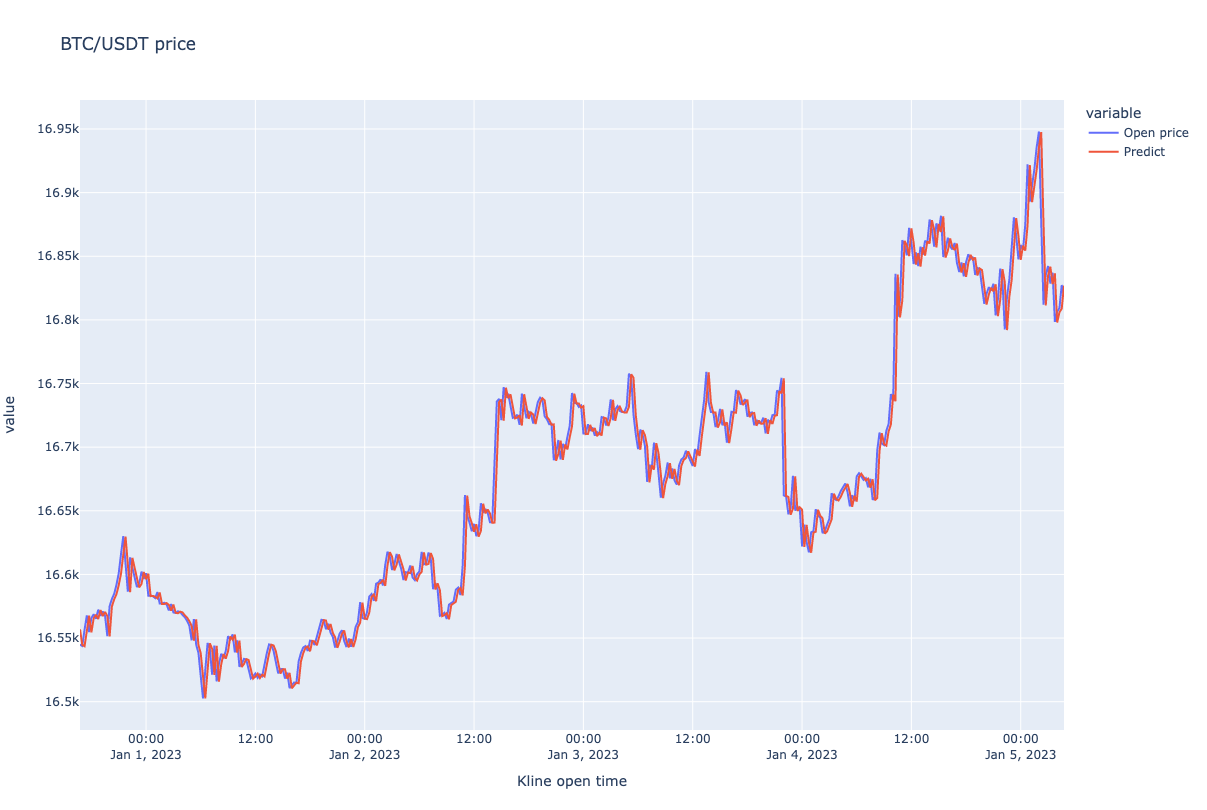

In [124]:
visualize_prediction(predictions)        

# 🎖 4. Model selection and evaluation

## ➡️ Naive cross validation to select model

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from estimator import LSTMEstimator, SarimaxEstimator, LinearRegressionEstimator

# cross vadiation strategy
tscv = TimeSeriesSplit(n_splits=3)

# mean squared error metric
metric = make_scorer(r2_score)

# models
estimators = [
    SarimaxEstimator(), 
    LinearRegressionEstimator(),
    LSTMEstimator(), 
]

scores_dict = {}

for estimator in estimators:
    scores = cross_val_score(estimator, X_origin_train, Y_origin_train, scoring=metric, cv=tscv, n_jobs=-1)
    print(estimator.__class__.__name__, scores.mean())
    scores_dict[estimator.__class__.__name__] = scores
    
scores_df = pd.DataFrame(scores_dict)
scores_df.index = scores_df.index.map(lambda x: f'fold_{x+1}')
scores_df.loc['mean'] = scores_df.mean()

In [140]:
scores_df

,SarimaxEstimator,LinearRegressionEstimator,LSTMEstimator
fold_1,0.959635,0.965183,0.810436
fold_2,0.819420,0.890837,0.674829
fold_3,0.941403,0.966196,0.922194
mean,0.906819,0.940739,0.802486


In [141]:
# find column with lowest mean score
best_estimator = scores_df.loc['mean'].idxmin()
best_estimator

'LSTMEstimator'

## ➡️ Select best model with best hyperparameters using grid search

In [ ]:
from estimator import Estimator, LinearRegressionEstimator, SarimaxEstimator, LSTMEstimator 
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline

tscv = TimeSeriesSplit()

metric = make_scorer(r2_score)

pipeline = Pipeline(
    steps=[("reg", Estimator())]
)

parameters = [
    {
        'reg__estimator': [LinearRegressionEstimator()]
    },
    {
        'reg__estimator': [SarimaxEstimator()],
        'reg__estimator__order': [(1, 1, 1), (3, 1, 1)],
        'reg__estimator__seasonal_order': [(1, 1, 1, 12), (3, 1, 1, 12)]
    },
    {
        'reg__estimator': [LSTMEstimator()],
        'reg__estimator__epochs': [1, 5, 10],
        'reg__estimator__batch_size': [4, 16, 32],
        'reg__estimator__neurons': [50, 100, 200]
    },
]

grid_search = GridSearchCV(pipeline, parameters, scoring=metric, cv=tscv, n_jobs=2, verbose=0)
grid_search.fit(X_train, Y_train)

,SarimaxEstimator,LinearRegressionEstimator,LSTMEstimator
fold_1,0.959635,0.965183,0.810436
fold_2,0.819420,0.890837,0.674829
fold_3,0.941403,0.966196,0.922194
mean,0.906819,0.940739,0.802486


In [143]:
grid_search.best_params_

{'reg__estimator': SarimaxEstimator(order=(1, 1, 1)),
 'reg__estimator__order': (1, 1, 1),
 'reg__estimator__seasonal_order': (1, 1, 1, 12)}

In [ ]:
from statsmodels.tsa.api import SARIMAX

data = pd_df.filter(["Open price"])

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data).reshape(-1)
# train, test = scaled_data[:TRAIN_DATA_LENGTH], scaled_data[TRAIN_DATA_LENGTH:]
# history = train.copy().tolist()

predictions = list()
# for t in range(len(test)):
model = SARIMAX(scaled_data, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()
output = model_fit.forecast()
pred_price = output[0]
predictions.append(pred_price)

In [45]:
pred_price = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
pred_price

array([[17155.97887478]])

In [ ]:
visualize_prediction(predictions)

In [ ]:
pred_price = scaler.inverse_transform(np.array(pred_price).reshape(-1,1))[0][0]
pred_price